In [1]:
import scvelo as scv
import scanpy as sc
import cellrank as cr
import os.path as op
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, "/Users/geenaildefonso/Projects/")
import mazebox as mb
sys.path.insert(1, '/Users/geenaildefonso/Dropbox (VU Basic Sciences)/')
from typing import Any
from copy import copy
from anndata import AnnData
import scipy.sparse as sp

In [2]:
import warnings

warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

In [2]:
dataframe1 = pd.DataFrame(data={"column1": [1, 2, 3, 4, 5]})
dataframe2 = pd.DataFrame(data={"column1": [2, 1]})

common = dataframe1.merge(dataframe2, on=["column1"])
result = dataframe1[dataframe1.column1.isin(common.column1)]
print(result)

   column1
0        1
1        2


In [16]:
adata = scv.read('/Users/geenaildefonso/Dropbox (VU Basic Sciences)/RPM/adata05.h5ad')

In [4]:
adata.obs['barcode']

SRR11594440:AACCACATCCACCTCAx-0-day_4    AACCACATCCACCTCA
SRR11594440:AAAGGTAGTTGCAAGGx-0-day_4    AAAGGTAGTTGCAAGG
SRR11594440:AAGCGAGAGACCAGACx-0-day_4    AAGCGAGAGACCAGAC
SRR11594440:AAGTCGTTCGTAGGGAx-0-day_4    AAGTCGTTCGTAGGGA
SRR11594440:AAGTACCGTTCGTACAx-0-day_4    AAGTACCGTTCGTACA
                                               ...       
SRR11594446:TTTGACTGTACCTTCCx-day_21     TTTGACTGTACCTTCC
SRR11594446:TTTGGAGGTGGCTACCx-day_21     TTTGGAGGTGGCTACC
SRR11594446:TTTGATCAGACTTCGTx-day_21     TTTGATCAGACTTCGT
SRR11594446:TTTGGTTAGGAAGTGAx-day_21     TTTGGTTAGGAAGTGA
SRR11594446:TTTGGAGCACCAACATx-day_21     TTTGGAGCACCAACAT
Name: barcode, Length: 15257, dtype: category
Categories (15201, object): ['AAACCCAAGCCGAATG', 'AAACCCAAGCGGTATG', 'AAACCCAAGGGACCAT', 'AAACCCAAGTGTTGTC', ..., 'TTTGTTGGTCCGAAGA', 'TTTGTTGGTCTTGTCC', 'TTTGTTGGTGCCGTAC', 'TTTGTTGTCCCAAGTA']

In [17]:
pseudo = pd.read_csv('PseudoCorr.csv', index_col=0, header = 0)
pseudo.reset_index(inplace=True)
pseudo = pseudo.rename(columns = {'index':'barcode'})

In [7]:
pseudo.columns

Index(['Barcode', 'Diffusion Pseudotime', 'Monocle Pseudotime', 'time'], dtype='object')

In [8]:
pseudo['Barcode']

0        AAAGGTAGTTGCAAGG_15806X1
1        AACCACATCCACCTCA_15806X1
2        AAGCGAGAGACCAGAC_15806X1
3        AAGTACCGTTCGTACA_15806X1
4        AAGTCGTTCGTAGGGA_15806X1
                   ...           
17058     TTATTGCCAACTTCTT-1_RPM4
17059     TTCCTCTTCCTGGGTG-1_RPM4
17060     TTCGCTGGTCCGACGT-1_RPM4
17061     TTCGGTCGTCTGTCCT-1_RPM4
17062     TTTCATGTCATCACTT-1_RPM4
Name: Barcode, Length: 17063, dtype: object

In [18]:
pseudo['barcode'] = [i.split('_')[0] for i in pseudo['Barcode']]
print('pseudo')
print(pseudo['barcode'])

adata.obs['barcode'] = [str(i.split(":")[1].split('x')[0]) for i in adata.obs_names]
print('adata')
print(adata.obs['barcode'])

# filtered_cells2 = []
# for i in pseudo['barcode']:
#     if i in list(adata.obs['barcode']): 
#         filtered_cells2.append(True)
#     else:
#         filtered_cells2.append(False)

pseudo
0          AAAGGTAGTTGCAAGG
1          AACCACATCCACCTCA
2          AAGCGAGAGACCAGAC
3          AAGTACCGTTCGTACA
4          AAGTCGTTCGTAGGGA
                ...        
17058    TTATTGCCAACTTCTT-1
17059    TTCCTCTTCCTGGGTG-1
17060    TTCGCTGGTCCGACGT-1
17061    TTCGGTCGTCTGTCCT-1
17062    TTTCATGTCATCACTT-1
Name: barcode, Length: 17063, dtype: object
adata
SRR11594440:AACCACATCCACCTCAx-0-day_4    AACCACATCCACCTCA
SRR11594440:AAAGGTAGTTGCAAGGx-0-day_4    AAAGGTAGTTGCAAGG
SRR11594440:AAGCGAGAGACCAGACx-0-day_4    AAGCGAGAGACCAGAC
SRR11594440:AAGTCGTTCGTAGGGAx-0-day_4    AAGTCGTTCGTAGGGA
SRR11594440:AAGTACCGTTCGTACAx-0-day_4    AAGTACCGTTCGTACA
                                               ...       
SRR11594446:TTTGACTGTACCTTCCx-day_21     TTTGACTGTACCTTCC
SRR11594446:TTTGGAGGTGGCTACCx-day_21     TTTGGAGGTGGCTACC
SRR11594446:TTTGATCAGACTTCGTx-day_21     TTTGATCAGACTTCGT
SRR11594446:TTTGGTTAGGAAGTGAx-day_21     TTTGGTTAGGAAGTGA
SRR11594446:TTTGGAGCACCAACATx-day_21     TTTGGAGCACCAAC

In [52]:
pseudo = pseudo.sort_values(by='barcode', ascending=True)

In [55]:
pseudo['barcode'][:10]

7560       AAACCCAAGCCGAATG
7561       AAACCCAAGCGGTATG
11506      AAACCCAAGGGACCAT
7562       AAACCCAAGTGTTGTC
15138    AAACCCACAAATCAGA-1
11507      AAACCCACAACCTATG
11508      AAACCCACACCAGTTA
598        AAACCCACACGTTGGC
599        AAACCCACACTTCATT
3915       AAACCCACAGACCGCT
Name: barcode, dtype: object

In [53]:
adata.obs = adata.obs.sort_values(by='barcode', ascending=True)

In [56]:
adata.obs['barcode'][:10]

SRR11594445:AAACCCAAGCCGAATGx-day_17    AAACCCAAGCCGAATG
SRR11594445:AAACCCAAGCGGTATGx-day_17    AAACCCAAGCGGTATG
SRR11594446:AAACCCAAGGGACCATx-day_21    AAACCCAAGGGACCAT
SRR11594445:AAACCCAAGTGTTGTCx-day_17    AAACCCAAGTGTTGTC
SRR11594446:AAACCCACAACCTATGx-day_21    AAACCCACAACCTATG
SRR11594446:AAACCCACACCAGTTAx-day_21    AAACCCACACCAGTTA
SRR11594443:AAACCCACACGTTGGCx-day_11    AAACCCACACGTTGGC
SRR11594443:AAACCCACACTTCATTx-day_11    AAACCCACACTTCATT
SRR11594444:AAACCCACAGACCGCTx-day_14    AAACCCACAGACCGCT
SRR11594443:AAACCCACATATCTCTx-day_11    AAACCCACATATCTCT
Name: barcode, dtype: object

In [54]:
adata.obs['barcode']

SRR11594445:AAACCCAAGCCGAATGx-day_17    AAACCCAAGCCGAATG
SRR11594445:AAACCCAAGCGGTATGx-day_17    AAACCCAAGCGGTATG
SRR11594446:AAACCCAAGGGACCATx-day_21    AAACCCAAGGGACCAT
SRR11594445:AAACCCAAGTGTTGTCx-day_17    AAACCCAAGTGTTGTC
SRR11594446:AAACCCACAACCTATGx-day_21    AAACCCACAACCTATG
                                              ...       
SRR11594443:TTTGTTGGTCACCACGx-day_11    TTTGTTGGTCACCACG
SRR11594444:TTTGTTGGTCCGAAGAx-day_14    TTTGTTGGTCCGAAGA
SRR11594446:TTTGTTGGTCTTGTCCx-day_21    TTTGTTGGTCTTGTCC
SRR11594445:TTTGTTGGTGCCGTACx-day_17    TTTGTTGGTGCCGTAC
SRR11594446:TTTGTTGTCCCAAGTAx-day_21    TTTGTTGTCCCAAGTA
Name: barcode, Length: 15257, dtype: object

In [59]:
adata.obs.shape

(15257, 108)

In [60]:
pseudo.shape

(17063, 5)

In [61]:
b = pd.merge(adata.obs, pseudo, on="barcode")

In [68]:
common = adata.obs.merge(pseudo, on=['barcode'])
c = adata.obs[adata.obs.barcode.isin(common.barcode)]

In [71]:
adata.obs

,Clusters,_X,_Y,dropkick_score,dropkick_label,arcsinh_n_genes_by_counts,batch,timepoint,initial_size_spliced,initial_size_unspliced,...,SCLC-P_Z_Score,SCLC-Y_Sig_Score,SCLC-Y_Z_Score,Phenotype,SCLC-A_Score_pos,SCLC-A2_Score_pos,SCLC-N_Score_pos,SCLC-P_Score_pos,SCLC-Y_Score_pos,diffusion_pseudotime
SRR11594445:AAACCCAAGCCGAATGx-day_17,0,8.262836,-7.631942,0.994979,1.0,9.092457,nan,day_17,23656,4621,...,0.907120,-0.000000,-0.000000,Generalist,0.183124,-0.000000,-0.000000,-0.000000,-0.000000,0.125544
SRR11594445:AAACCCAAGCGGTATGx-day_17,7,13.148660,33.983105,0.956230,1.0,8.615046,nan,day_17,11501,1889,...,-0.000000,-0.000000,-0.000000,Generalist,-0.000000,0.019309,0.163438,0.165093,-0.000000,0.122486
SRR11594446:AAACCCAAGGGACCATx-day_21,2,26.372231,-24.111509,0.998126,1.0,9.084777,nan,day_21,22677,5236,...,-0.000000,-0.000000,-0.000000,Generalist,-0.000000,-0.000000,0.200015,0.199187,-0.000000,0.122934
SRR11594445:AAACCCAAGTGTTGTCx-day_17,2,-30.321774,-5.889364,0.990506,1.0,8.841304,nan,day_17,17302,2276,...,0.550628,-0.000000,-0.000000,Generalist,-0.000000,-0.000000,0.117279,0.053133,-0.000000,0.120870
SRR11594446:AAACCCACAACCTATGx-day_21,0,-19.904209,-25.285124,0.976213,1.0,8.729397,nan,day_21,14482,3074,...,-0.000000,-0.000000,-0.000000,SCLC-A2,-0.000000,0.586654,0.166721,-0.000000,-0.000000,0.126884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR11594443:TTTGTTGGTCACCACGx-day_11,1,-3.128966,1.649701,0.991031,1.0,9.049702,nan,day_11,22167,3299,...,0.454426,0.010897,2.352327,Generalist,0.056212,-0.000000,-0.000000,0.152491,0.013242,0.120966
SRR11594444:TTTGTTGGTCCGAAGAx-day_14,6,-19.655493,-38.446579,0.987072,1.0,8.850804,nan,day_14,15317,2306,...,0.314390,-0.000000,-0.000000,Generalist,-0.000000,0.079893,0.002555,-0.000000,0.101777,0.122037
SRR11594446:TTTGTTGGTCTTGTCCx-day_21,2,19.778913,-18.341286,0.995400,1.0,8.928243,nan,day_21,16528,3012,...,-0.000000,-0.000000,-0.000000,None,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.066262
SRR11594445:TTTGTTGGTGCCGTACx-day_17,4,5.839077,-25.006765,0.992308,1.0,8.644002,nan,day_17,11198,1809,...,-0.000000,-0.000000,-0.000000,Generalist,-0.000000,0.168620,0.050038,0.076237,-0.000000,0.122814


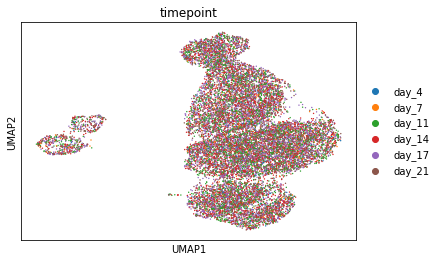

In [74]:
sc.pl.umap(adata, color = 'timepoint')

In [28]:
pseudo.columns

Index(['Barcode', 'Diffusion Pseudotime', 'Monocle Pseudotime', 'time',
       'barcode'],
      dtype='object')

In [40]:
ptlist = []
ptlist = list(pseudo['Diffusion Pseudotime'])

In [47]:
print(len(ptlist[:15257]))

15257


In [48]:
adata.obs['diffusion_pseudotime'] = ptlist[:15257]

In [51]:
print(pseudo['barcode'][:10], pseudo['Diffusion Pseudotime'][:10])

0    AAAGGTAGTTGCAAGG
1    AACCACATCCACCTCA
2    AAGCGAGAGACCAGAC
3    AAGTACCGTTCGTACA
4    AAGTCGTTCGTAGGGA
5    AATGACCGTCTGTGGC
6    ACATCCCCATTACGGT
7    ACCAAACAGCCACCGT
8    ACTGATGGTATCTCTT
9    AGAAATGAGAGCCGAT
Name: barcode, dtype: object 0    0.080624
1    0.070802
2    0.069488
3    0.057792
4    0.069608
5    0.066701
6    0.081641
7    0.081827
8    0.038994
9    0.083562
Name: Diffusion Pseudotime, dtype: float64


In [50]:
print(adata.obs['barcode'][:10], adata.obs['diffusion_pseudotime'][:10])

SRR11594440:AACCACATCCACCTCAx-0-day_4    AACCACATCCACCTCA
SRR11594440:AAAGGTAGTTGCAAGGx-0-day_4    AAAGGTAGTTGCAAGG
SRR11594440:AAGCGAGAGACCAGACx-0-day_4    AAGCGAGAGACCAGAC
SRR11594440:AAGTCGTTCGTAGGGAx-0-day_4    AAGTCGTTCGTAGGGA
SRR11594440:AAGTACCGTTCGTACAx-0-day_4    AAGTACCGTTCGTACA
SRR11594440:AATGACCGTCTGTGGCx-0-day_4    AATGACCGTCTGTGGC
SRR11594440:ACCAAACAGCCACCGTx-0-day_4    ACCAAACAGCCACCGT
SRR11594440:ACCAACAAGTGATAGTx-0-day_4    ACCAACAAGTGATAGT
SRR11594440:ACATCCCCATTACGGTx-0-day_4    ACATCCCCATTACGGT
SRR11594440:ACTGCAAGTCTGCCTTx-0-day_4    ACTGCAAGTCTGCCTT
Name: barcode, dtype: object SRR11594440:AACCACATCCACCTCAx-0-day_4    0.080624
SRR11594440:AAAGGTAGTTGCAAGGx-0-day_4    0.070802
SRR11594440:AAGCGAGAGACCAGACx-0-day_4    0.069488
SRR11594440:AAGTCGTTCGTAGGGAx-0-day_4    0.057792
SRR11594440:AAGTACCGTTCGTACAx-0-day_4    0.069608
SRR11594440:AATGACCGTCTGTGGCx-0-day_4    0.066701
SRR11594440:ACCAAACAGCCACCGTx-0-day_4    0.081641
SRR11594440:ACCAACAAGTGATAGTx-0-day_4    

# Run scVelo

We will use the dynamical model from scVelo to estimate the velocities. Please make sure to have at least version 0.2.3 of scVelo installed to make use parallelisation in scv.tl.recover_dynamics. On my laptop, using 8 cores, the below cell takes about 1:30 min to execute.

In [75]:
tfs = ['SP100', 'FOSL1', 'HES1', 'NFKBIZ', 'RELB', 'EPAS1', 'BCL3', 'REST', 'SP110', 'NFKB2', 'TEAD2', 'HMG20B', 'SIX5',
       'RARG', 'TEAD4', 'ZNF217', 'SP140L', 'SOX18', 'HOXC13', 'STAT6', 'ETV4', 'KLF2', 'MITF', 'NR0B2', 'ASCL1', 'ZBTB7C', 'ELF3',
       'RORC', 'FOXA2', 'ETS2','TOX3', 'XBP1', 'ST18', 'FOXA1', 'OVOL2', 'ZNF664', 'TBX10', 'PROX1', 'ETV6', 'CEBPD', 'TFCP2L1', 'FOXJ3',
       'ZNF407', 'ZNF511','ZNF396', 'RBPJ', 'ZSCAN31', 'HOXB5', 'ZNF3', 'TSHZ2', 'ZBTB16', 'ZNF10', 'FLI1', 'GATA4', 'NR0B1', 'NHLH1',
       'NEUROD6', 'ZNF581', 'TCF15', 'LYAR', 'ISL2', 'OLIG2', 'NEUROD1', 'INSM1', 'PAX5', 'SP6', 'MYT1', 'HES6', 'ZNF24', 'ISL1', 'ZNF397',
       'SOX11', 'ZNF253', 'SMAD4', 'RBP1', 'ONECUT2', 'ZNF711', 'DLX5', 'GRIP1', 'ZNF157', 'ZNF713', 'ZNF136', 'FOXN4', 'PATZ1', 'ZNF491',
       'ZBTB21', 'KLF12', 'ZNF501', 'ZNF785', 'CXXC1', 'ZNF324', 'ZNF764', 'ZBTB18', 'KAT8', 'ZNF334', 'POU4F1', 'ZNF250', 'ZNF132',
       'SALL2', 'DLX6', 'MBD1','SOX1', 'ZFP3', 'ZNF543', 'POU2F1', 'NONO', 'SMAD9', 'ZKSCAN2', 'TCF12', 'VEZF1', 'TOX', 'BHLHE22', 'MTA1',
       'TCF3', 'SCRT2', 'RFX7','NHLH2', 'SCRT1', 'RCOR2', 'PURG', 'TBPL1', 'TCF4', 'EBF1', 'ZNF749', 'NEUROD2', 'ZNF423', 'BACH2', 'GLI1',
       'ZFP64','NKX2-1', 'MYC', 'YAP1', 'POU2F3', 'MYCL', 'MYCN', 'ASCL2', 'AVIL', 'CHAT', 'GFI1B',
      'CHGA','EPCAM', 'Tmed11', 'Rsl24d1','Olfr123', 'Adam20','Srsf2', 'G3bp1', 'Snrpd1', 'Pgk1', 'Rps3', 'Psmd1', 'Orc2', 'Psma2', 'Syncrip', 'Cnbp',
            'Gspt1', 'Ppm1g', 'Eif4e', 'Hnrnpa3', 'Abce1', 'Hnrnpu',  'Ifrd1', 'Kpna2', 'Dhx15', 'Mcm4']

In [76]:
adata.var_names

Index(['Rplp1', 'Rps8', 'Ftl1', 'Rplp2', 'Hsp90ab1', 'Rpl23', 'Gm42418',
       'Rpl19', 'Rpl13', 'Rpsa',
       ...
       'Myh8', 'Klra1', 'Gm36079', 'Gm1110', 'Lcn10', 'Nr0b1', 'Sox1', 'Chat',
       'Neurod1', 'Olig2'],
      dtype='object', length=21163)

In [77]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, retain_genes = tfs)
# sc.tl.pca(adata)
# sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
# scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

Filtered out 10170 genes that are detected 20 counts (shared).


In [78]:
scv.tl.recover_dynamics(adata)

recovering dynamics (using 1/16 cores)


  0%|          | 0/1680 [00:00<?, ?gene/s]

    finished (0:43:52) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


/Users/geenaildefonso/anaconda/envs/mazebox_env/lib/python3.9/site-packages/scvelo/tools/dynamical_model.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/Users/geenaildefonso/anaconda/envs/mazebox_env/lib/python3.9/site-packages/scvelo/tools/dynamical_model.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


Once we have the parameters, we can use these to compute the velocities and the velocity graph. The velocity graph is a weighted graph that specifies how likely two cells are to transition into another, given their velocity vectors and relative positions.

In [79]:
scv.tl.velocity(adata, mode="dynamical")
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:40) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/16 cores)


  0%|          | 0/15257 [00:00<?, ?cells/s]

/Users/geenaildefonso/anaconda/envs/mazebox_env/lib/python3.9/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:01:23) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:04) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


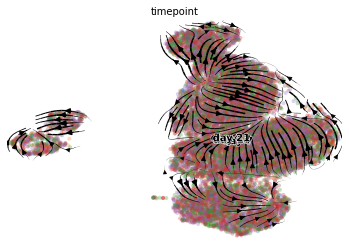

In [80]:
# scv.pl.velocity_embedding_stream(
#     adata, basis="umap", legend_fontsize=12, title="", smooth=0.8, min_mass=4
# )

scv.pl.velocity_embedding_stream(adata, basis='umap',color=['timepoint'])

In [ ]:
scv.tl.velocity(adata, mode="stochastic")
scv.tl.velocity_graph(adata)

In [ ]:
sc.pp.pca(adata)

In [ ]:
scv.pl.pca(adata, color = 'leiden')

In [ ]:
adata

# Run CellRank

CellRank offers various ways to infuse directionality into single-cell data. Here, the directional information comes from RNA velocity, and we use this information to compute initial & terminal states as well as fate probabilities for the dynamical process of pancreatic development.

# Identify Terminal States

Terminal states can be computed by running the following command:


In [ ]:
cr.pl.circular_projection(
    adata, keys=["timepoint", "kl_divergence"], legend_loc="upper right"
)

In [ ]:
cr.tl.terminal_states(adata, cluster_key="leiden", weight_connectivities=0.2)

In [ ]:
cr.tl.terminal_states(adata, cluster_key="timepoint", weight_connectivities=0.2)

In [ ]:
cr.tl.lineages(adata)

model = cr.ul.models.GAM(adata)

In [ ]:
cr.pl.gene_trends(
    adata,
    model,
    ['Rsl24d1'],
    data_key="Ms",
    time_key="dpt_pseudotime",
    show_progress_bar=False,
)